<a href="https://colab.research.google.com/github/DuilioEGomez/BigData_And_MachineLearning/blob/main/Beer_reviews_Grupo_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display
import ipywidgets as widgets

In [ ]:
#url = '/content/drive/MyDrive/Colab Notebooks/Beer_Reviews/beer_reviews.csv'
url = '/content/drive/MyDrive/Colab Notebooks/Beers/beer_reviews_1.csv'
df = pd.read_csv(url)

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986.0
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213.0
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215.0
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969.0
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97240,140,Sierra Nevada Brewing Co.,1254462726,4.0,4.5,4.0,donniecuffs,American IPA,4.0,5.0,Northern Hemisphere Harvest Wet Hop Ale,6.7,6549.0
97241,140,Sierra Nevada Brewing Co.,1254206514,4.0,4.0,3.5,claminat420,American IPA,3.5,4.0,Northern Hemisphere Harvest Wet Hop Ale,6.7,6549.0
97242,140,Sierra Nevada Brewing Co.,1253666490,4.0,4.5,4.5,rtratzlaff,American IPA,4.5,4.0,Northern Hemisphere Harvest Wet Hop Ale,6.7,6549.0
97243,140,Sierra Nevada Brewing Co.,1253646604,4.5,4.0,4.0,ColForbinBC,American IPA,4.0,4.0,Northern Hemisphere Harvest Wet Hop Ale,6.7,6549.0


In [ ]:
#Empezaremos tomando como datos relevantes las columnas "review_overall"	"review_aroma"	"review_appearance"	"review_palate"	"review_taste" y "beer_abv" para cada uno de los estilos de cerveza (beer_style)
df_copia = df.copy()
# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Columnas relevantes para el análisis
relevant_columns = ["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste", "beer_abv", "beer_style"]

# Calcular estadísticas descriptivas por cada estilo de cerveza
beer_stats = df_copia[relevant_columns].groupby('beer_style').agg(['mean', 'median', 'std', 'min', 'max', lambda x: x.value_counts().index[0] if x.dtype == 'float64' else lambda x: x.value_counts().idxmax()])

# Renombrar las columnas para mayor claridad
beer_stats.columns = ['overall_mean', 'overall_median', 'overall_std', 'overall_min', 'overall_max', 'overall_mode',
                      'aroma_mean', 'aroma_median', 'aroma_std', 'aroma_min', 'aroma_max', 'aroma_mode',
                      'appearance_mean', 'appearance_median', 'appearance_std', 'appearance_min', 'appearance_max', 'appearance_mode',
                      'palate_mean', 'palate_median', 'palate_std', 'palate_min', 'palate_max', 'palate_mode',
                      'taste_mean', 'taste_median', 'taste_std', 'taste_min', 'taste_max', 'taste_mode',
                      'abv_mean', 'abv_median', 'abv_std', 'abv_min', 'abv_max', 'abv_mode']

# Visualizar las estadísticas por estilo de cerveza
beer_stats




,overall_mean,overall_median,overall_std,overall_min,overall_max,overall_mode,aroma_mean,aroma_median,aroma_std,aroma_min,aroma_max,aroma_mode,appearance_mean,appearance_median,appearance_std,appearance_min,appearance_max,appearance_mode,palate_mean,palate_median,palate_std,palate_min,palate_max,palate_mode,taste_mean,taste_median,taste_std,taste_min,taste_max,taste_mode,abv_mean,abv_median,abv_std,abv_min,abv_max,abv_mode
beer_style,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Altbier,3.459596,3.50,0.762965,1.0,5.0,4.0,3.323232,3.50,0.663834,1.0,5.0,3.5,3.555556,3.5,0.535012,1.0,4.5,4.0,3.401515,3.50,0.706495,1.0,5.0,3.5,3.305556,3.50,0.764916,1.0,5.0,3.5,5.325455,4.19,2.123969,3.90,10.0,4.19
American Adjunct Lager,3.007874,3.00,0.889228,1.0,5.0,3.0,2.599738,2.50,0.686735,1.0,4.0,3.0,2.976378,3.0,0.689751,1.0,5.0,3.0,2.828084,3.00,0.769466,1.0,5.0,3.0,2.742782,3.00,0.798506,1.0,4.5,3.0,4.948294,5.00,0.456276,3.90,5.6,5.00
American Amber / Red Ale,3.613011,3.50,0.668333,1.0,5.0,4.0,3.485502,3.50,0.626170,1.5,5.0,3.5,3.661338,3.5,0.529621,1.5,5.0,4.0,3.529740,3.50,0.617099,1.0,5.0,4.0,3.519331,3.50,0.662279,1.0,5.0,4.0,5.921264,5.50,1.245688,2.50,9.7,5.50
American Amber / Red Lager,3.606383,3.50,0.683153,2.0,5.0,3.5,3.404255,3.50,0.672748,2.0,5.0,3.5,3.627660,3.5,0.515711,2.5,4.5,3.5,3.531915,3.50,0.535726,2.0,4.5,3.5,3.627660,3.50,0.733278,2.0,5.0,3.5,5.138298,4.80,0.680650,4.50,7.8,4.80
American Barleywine,3.952527,4.00,0.614307,1.0,5.0,4.0,4.107070,4.00,0.488399,1.5,5.0,4.0,4.191424,4.0,0.439303,2.0,5.0,4.0,4.097626,4.00,0.518341,1.0,5.0,4.0,4.153012,4.00,0.569414,1.0,5.0,4.5,10.155526,9.60,1.006304,4.00,15.0,9.60
American Black Ale,3.922222,4.00,0.509685,1.5,5.0,4.0,3.848718,4.00,0.498047,1.5,5.0,4.0,4.125641,4.0,0.462674,1.5,5.0,4.0,3.884615,4.00,0.520901,1.0,5.0,4.0,3.917094,4.00,0.510555,1.5,5.0,4.0,7.636581,8.00,1.073464,4.90,12.0,8.00
American Blonde Ale,3.494845,3.50,0.762147,1.0,5.0,4.0,3.240550,3.50,0.635744,1.0,5.0,3.5,3.400344,3.5,0.637632,1.0,5.0,3.5,3.335052,3.50,0.654870,1.0,5.0,3.5,3.310997,3.50,0.680702,1.0,5.0,3.5,4.764124,4.60,0.487543,3.50,8.1,4.60
American Brown Ale,3.871971,4.00,0.588343,1.0,5.0,4.0,3.623117,3.50,0.539011,1.0,5.0,3.5,3.916503,4.0,0.456570,2.0,5.0,4.0,3.726261,4.00,0.534876,1.5,5.0,4.0,3.780288,4.00,0.565521,1.0,5.0,4.0,5.469221,5.50,1.109945,3.50,10.0,5.50
American Dark Wheat Ale,3.766667,4.00,0.530049,3.0,4.5,4.0,3.800000,4.00,0.455129,3.0,4.5,4.0,3.933333,4.0,0.371612,3.0,4.5,4.0,3.500000,3.50,0.654654,2.5,4.5,3.5,3.733333,3.50,0.457738,3.0,4.5,3.5,5.306667,5.40,0.369298,4.00,5.6,5.40


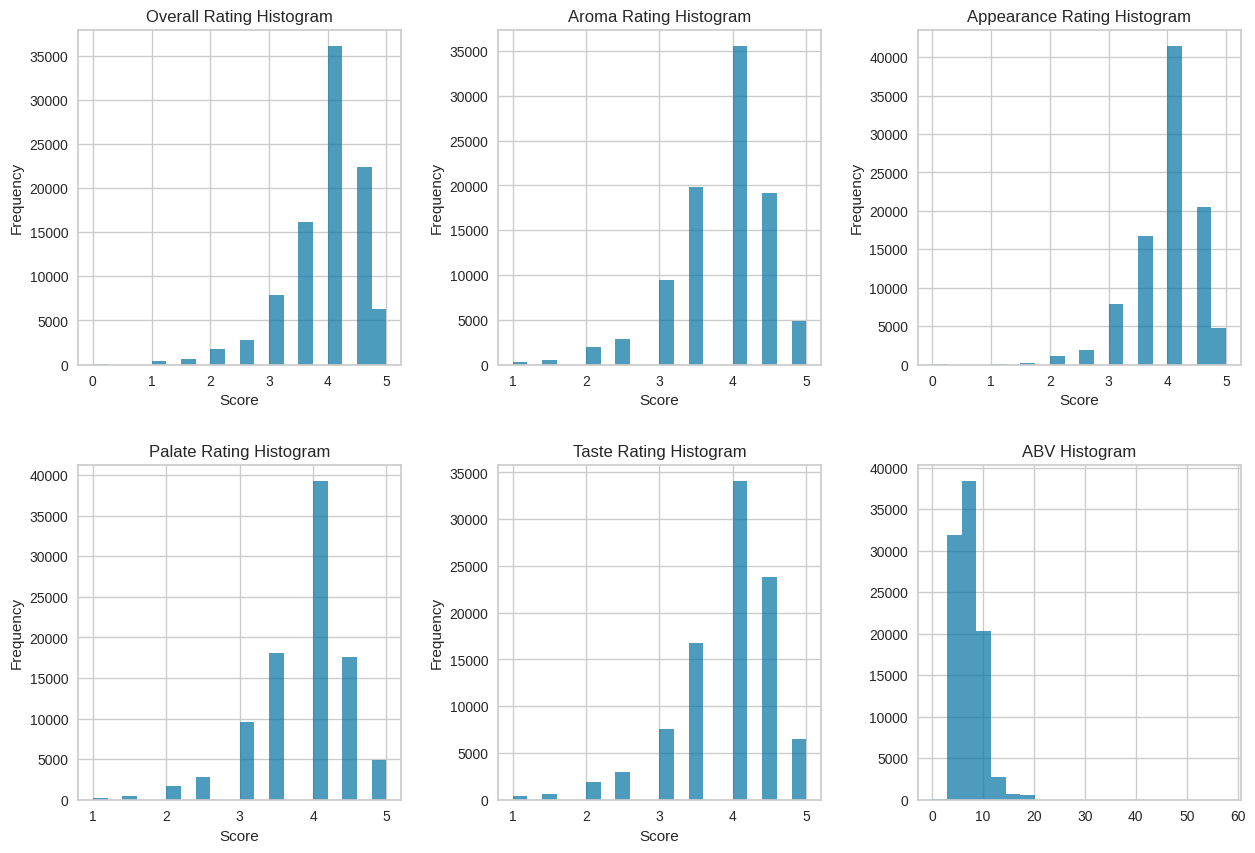

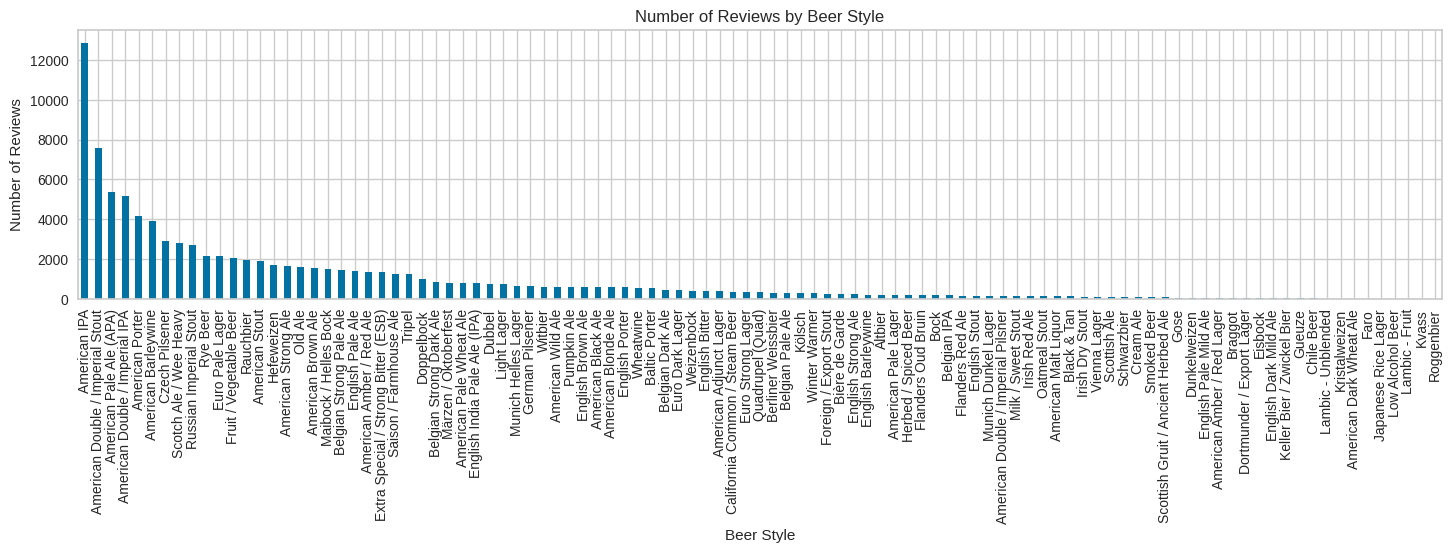

In [ ]:
import matplotlib.pyplot as plt

# Generar histogramas para las puntuaciones de revisiones y el ABV
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Histogramas para las puntuaciones de revisiones
df_copia[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']].hist(bins=20, alpha=0.7, ax=axes.flatten()[:5])

# Histograma para el contenido de alcohol (ABV)
df_copia['beer_abv'].hist(bins=20, alpha=0.7, ax=axes[1, 2])
axes[1, 2].set_title('ABV Histogram')

# Configuraciones y etiquetas para los histogramas de puntuaciones de revisiones
for i, col in enumerate(['Overall', 'Aroma', 'Appearance', 'Palate', 'Taste']):
    axes[i // 3, i % 3].set_title(f'{col} Rating Histogram')
    axes[i // 3, i % 3].set_xlabel('Score')
    axes[i // 3, i % 3].set_ylabel('Frequency')

# Gráfico de barras para la cantidad de revisiones por estilo de cerveza
plt.figure(figsize=(15, 6))  # Ajustar el ancho del gráfico
beer_style_counts = df_copia['beer_style'].value_counts()
beer_style_counts.plot(kind='bar')
plt.title('Number of Reviews by Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Number of Reviews')
plt.xticks(range(len(beer_style_counts.index)), beer_style_counts.index, rotation=90)  # Ajustar el espaciado y rotación de las etiquetas
plt.tight_layout(pad=2)  # Ajustar el espaciado entre los subplots
plt.show()


In [ ]:
# Seleccionar columnas relevantes para el cálculo de la correlación
review_columns = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']

# Calcular la matriz de correlación
correlation_matrix = df_copia[review_columns].corr()
correlation_matrix

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.593245,0.486434,0.682739,0.772714
review_aroma,0.593245,1.000000,0.528003,0.592026,0.697492
review_appearance,0.486434,0.528003,1.000000,0.548036,0.525086
review_palate,0.682739,0.592026,0.548036,1.000000,0.714661
review_taste,0.772714,0.697492,0.525086,0.714661,1.000000


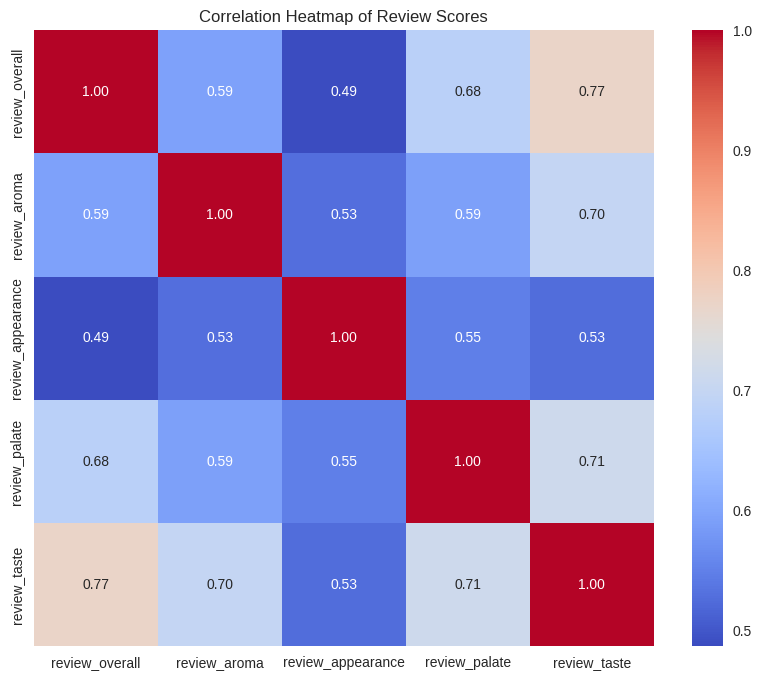

In [ ]:
# Graficar el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Review Scores')
plt.show()

<Figure size 1500x800 with 0 Axes>

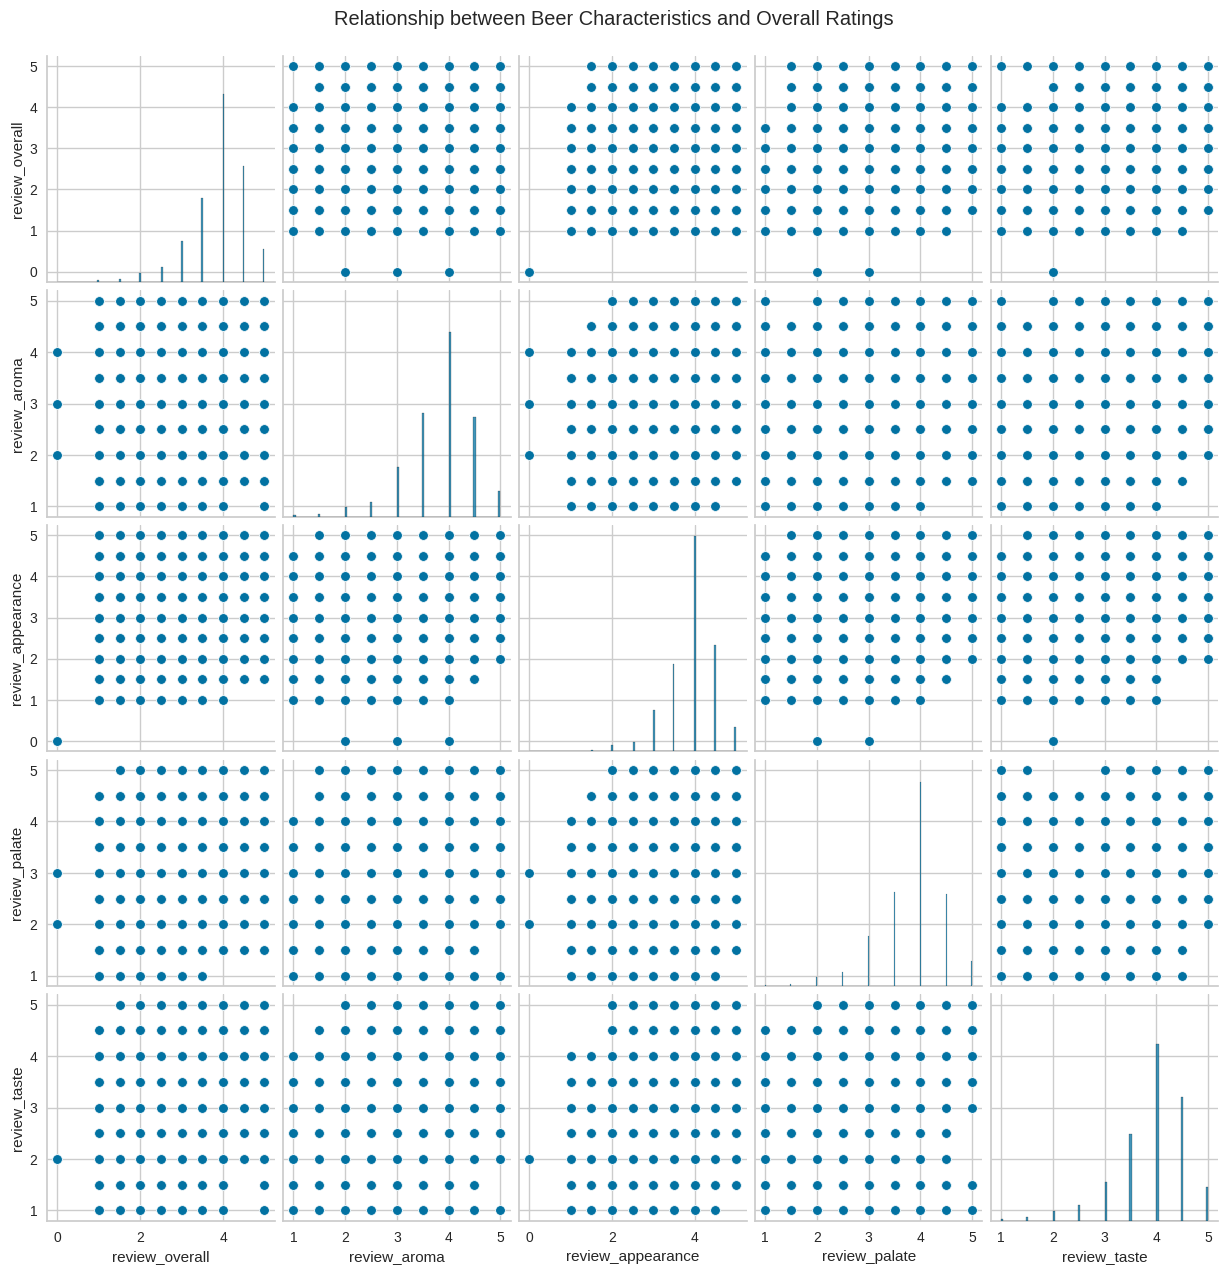

In [ ]:
# Gráficos de dispersión para ver la relación entre características y puntuaciones generales
plt.figure(figsize=(15, 8))

# Puntuaciones generales vs. otras características
sns.pairplot(df_copia, vars=['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste'])
plt.suptitle('Relationship between Beer Characteristics and Overall Ratings', y=1.02)
plt.show()

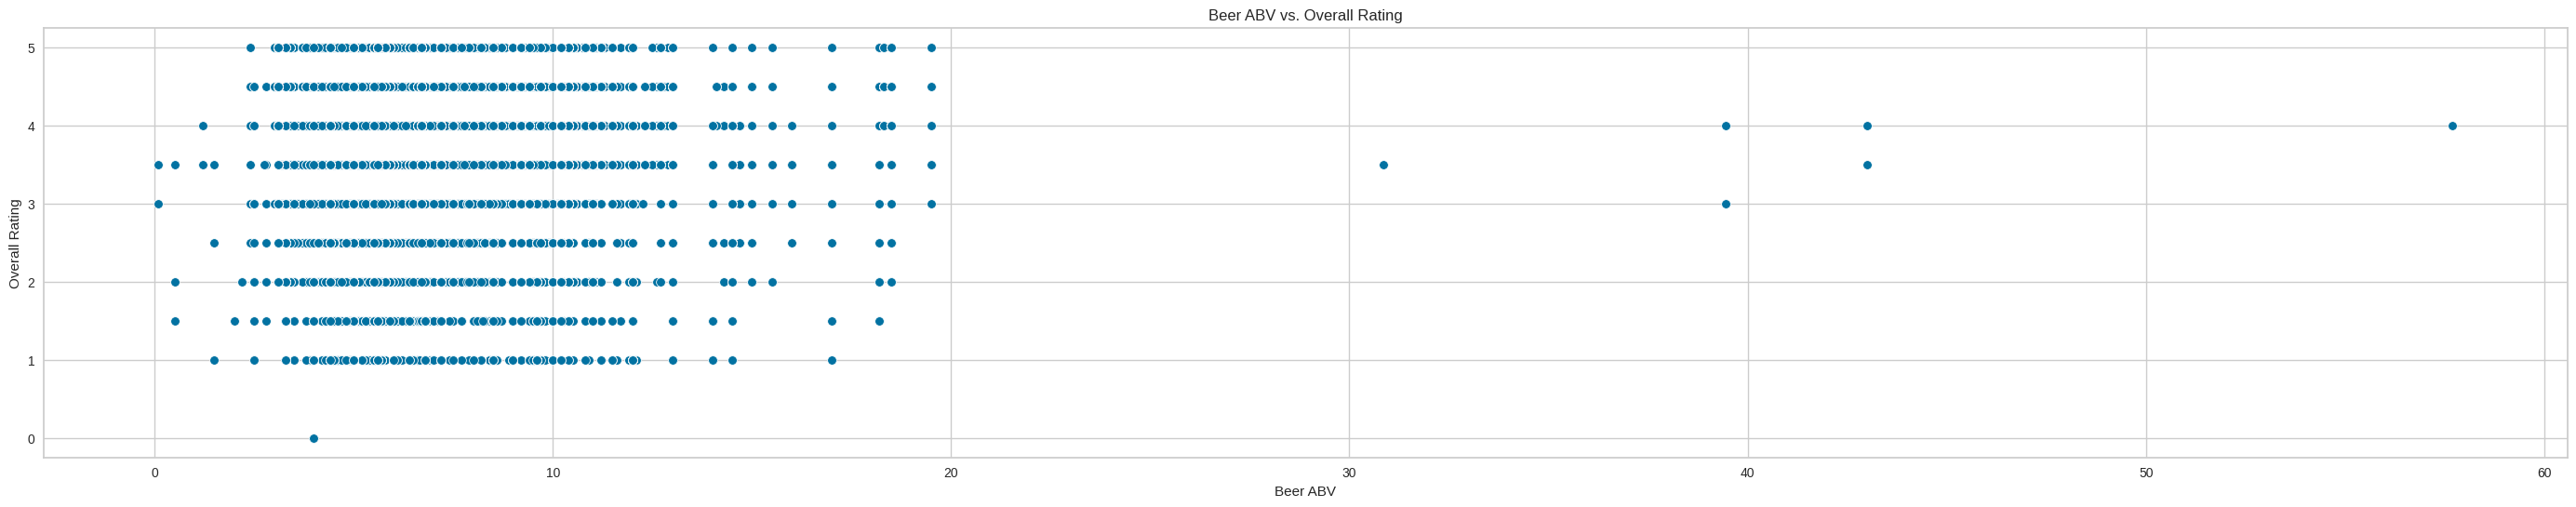

In [ ]:
# Gráfico de dispersión entre contenido de alcohol (beer_abv) y puntuaciones generales
plt.figure(figsize=(35, 6))
sns.scatterplot(x='beer_abv', y='review_overall', data=df_copia)
plt.title('Beer ABV vs. Overall Rating')
plt.xlabel('Beer ABV')
plt.ylabel('Overall Rating')
plt.show()

# Calcular el coeficiente de correlación entre beer_abv y las puntuaciones generales
correlation_abv_overall = df_copia['beer_abv'].corr(df_copia['review_overall'])


In [ ]:
cervezas_alto_abv = df_copia[df_copia['beer_abv'] > 30]
cervezas_alto_abv

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
12918,6513,Schorschbräu,1248785936,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 31%,30.86,51466.0
12919,6513,Schorschbräu,1316780901,4.0,4.0,4.0,kappldav123,Eisbock,4.0,3.5,Schorschbräu Schorschbock 57%,57.70,73368.0
12934,6513,Schorschbräu,1264684153,4.0,4.5,4.5,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 40%,39.44,55712.0
12939,6513,Schorschbräu,1309974178,4.0,4.0,3.5,Sunnanek,Eisbock,4.0,4.0,Schorschbräu Schorschbock 43%,43.00,57856.0
12940,6513,Schorschbräu,1274469798,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 43%,43.00,57856.0
12941,6513,Schorschbräu,1321041551,3.0,3.0,3.0,orangesol,Eisbock,2.0,3.0,Schorschbräu Schorschbock 40%,39.44,55712.0
12942,6513,Schorschbräu,1274645294,3.0,3.5,3.5,thepeter,Eisbock,3.5,3.5,Schorschbräu Schorschbock 40%,39.44,55712.0


## Modelo de Clasificacion RandomForestClassifier

En este bloque de codigo, llevamos a cabo la ejecución del modelo de Clasificación llamado "RandomForestClassifier" que básicamente es un algoritmo de aprendizaje automático que utiliza un conjunto de árboles de decisión para clasificar datos. Construye múltiples árboles y combina sus decisiones para predecir la clase a la que pertenecen los datos de entrada.

Lo que queremos lograr con este modelo es que el mismo pueda predecir con la mayor exactitud un estilo de cerveza de acuerdo a los datos de entrada de las columnas 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv' que serían la calificación del aroma, la de la apariencia, la del paladar, la del gusto y el volumen de alcohol de cada cerveza.

In [ ]:
# Columnas a mantener
columnas_a_mantener = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_style']

# Eliminar columnas no deseadas
df2 = df_copia[columnas_a_mantener]

# Separar características y variable objetivo
X = df2.drop('beer_style', axis=1)  # Características
y = df2['beer_style']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importar y entrenar el modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Realizar predicciones
predictions = rf_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, predictions))

Accuracy (Exactitud): Es la proporción de predicciones correctas sobre el total de predicciones realizadas. En este caso, el modelo tiene una exactitud de aproximadamente 0.51 o 51%, lo que significa que acierta en alrededor del 51% de las predicciones en el conjunto de prueba.

Precision (Precisión): Indica la proporción de elementos que el modelo predijo correctamente como positivos de entre todos los elementos que el modelo predijo como positivos. Por ejemplo, para la clase "American IPA", la precisión es del 74%. Esto significa que del total de predicciones que el modelo hizo como "American IPA", el 74% son correctas.

Recall (Recuperación o Sensibilidad): Representa la proporción de elementos positivos que el modelo predijo correctamente de todos los elementos que realmente son positivos. Por ejemplo, para la clase "American IPA", el recall es del 86%. Esto indica que el modelo identificó correctamente el 86% de todas las instancias reales de "American IPA".

F1-score: Es una media armónica entre precisión y recuperación. Proporciona un equilibrio entre ambos y es útil cuando hay un desbalance entre las clases. En general, el F1-score considera tanto la precisión como la recuperación para calcular un puntaje general.

## Ajuste de hiperparámetros del Modelo RandomForestClassifier

Aquí llevamos un ajuste de hiperparámetros para intentar aumentar el accuracy del modelo y así hacerlo mas efectivo.Decidimos hacer 5 iteraciones de búsqueda (n_iter = 5) con una validación cruzada de 5 folds (cv=5), la razón por la cual decidimos hacer que sean 5 folds se debe a que esto nos permite mantener un equilibrio similar al ratio tradicional de 80-20 entre entrenamiento y prueba, lo que asegura una evaluación más sólida del modelo.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir la grilla de hiperparámetros ajustada
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2]
}

# Inicializar el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicializar Randomized Search con el clasificador y la grilla de hiperparámetros ajustada
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)

# Entrenar Randomized Search para encontrar la mejor combinación de hiperparámetros
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear un clasificador con los mejores hiperparámetros y entrenarlo
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Realizar predicciones
predictions = best_rf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy del modelo: {accuracy:.2f}')

print(classification_report(y_test, predictions))


Ajuste de Hiperparámetros: Se ajustaron los hiperparámetros de un modelo clasificador utilizando un método de búsqueda Random Search. Los hiperparámetros ajustados son 'n_estimators', 'min_samples_split', 'min_samples_leaf', y 'max_depth'. Se encontraron los siguientes valores como los mejores: 'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': None.

Métricas de Evaluación del Modelo:

Accuracy: La precisión general del modelo es del 53%, lo que significa que acierta en el 53% de las predicciones en el conjunto de datos de prueba.

Precision, Recall, F1-score: Estas métricas miden la precisión, la exhaustividad y el equilibrio entre ambas para cada clase de la variable objetivo (en este caso, los estilos de cerveza). Los valores de precisión, recall y F1-score varían según cada clase, indicando cómo el modelo se desempeña para predecir cada clase en particular.

UndefinedMetricWarning: Se está mostrando esta advertencia porque algunas clases tienen cero muestras predichas o verdaderas. Esto puede suceder cuando la cantidad de datos en ciertas clases es muy limitada, lo que hace difícil para el modelo hacer predicciones precisas para esas clases específicas.

En resumen, el modelo ajustado tiene una precisión del 53%, pero muestra dificultades para predecir algunas clases debido a la falta de muestras representativas. Esto podría ser mejorado con estrategias como recopilar más datos para clases poco representadas o considerar técnicas de balanceo de clases.

In [ ]:
import ipywidgets as widgets
from IPython.display import clear_output, display

# Crear sliders para cada característica
slider_review_aroma = widgets.FloatSlider(value=3.0, min=0.0, max=5.0, step=0.1, description='aroma:')
slider_review_appearance = widgets.FloatSlider(value=3.0, min=0.0, max=5.0, step=0.1, description='appearance:')
slider_review_palate = widgets.FloatSlider(value=3.0, min=0.0, max=5.0, step=0.1, description='palate:')
slider_review_taste = widgets.FloatSlider(value=3.0, min=0.0, max=5.0, step=0.1, description='taste:')
slider_beer_abv = widgets.FloatSlider(value=5.0, min=0.0, max=20.0, step=0.1, description='beer_abv:')

# Botón para realizar la predicción
button_predict = widgets.Button(description="Predecir Estilo de Cerveza")

output = widgets.Output()

def on_button_predict_click(b):
    with output:
        clear_output(wait=True)
        # Obtener los valores de los sliders
        review_aroma = slider_review_aroma.value
        review_appearance = slider_review_appearance.value
        review_palate = slider_review_palate.value
        review_taste = slider_review_taste.value
        beer_abv = slider_beer_abv.value

        # Realizar la predicción con el modelo entrenado
        nueva_cerveza = [review_aroma, review_appearance, review_palate, review_taste, beer_abv]
        estilo_predicho = rf_classifier.predict([nueva_cerveza])

        print("Estilo de cerveza recomendado:", estilo_predicho[0])

button_predict.on_click(on_button_predict_click)

# Mostrar los sliders y el botón
display(slider_review_aroma, slider_review_appearance, slider_review_palate, slider_review_taste, slider_beer_abv, button_predict, output)



FloatSlider(value=3.0, description='aroma:', max=5.0)

FloatSlider(value=3.0, description='appearance:', max=5.0)

FloatSlider(value=3.0, description='palate:', max=5.0)

FloatSlider(value=3.0, description='taste:', max=5.0)

FloatSlider(value=5.0, description='beer_abv:', max=20.0)

Button(description='Predecir Estilo de Cerveza', style=ButtonStyle())

Output()

##Importancia de las características

En este bloque de código, obtenemos de los datos de entrada cual es el mas relevante para el modelo de aprendizaje gracias a una función llamada "feature_importances_"

Posteriormente proseguimos a graficar la importancia de cada uno de los datos de entrada.

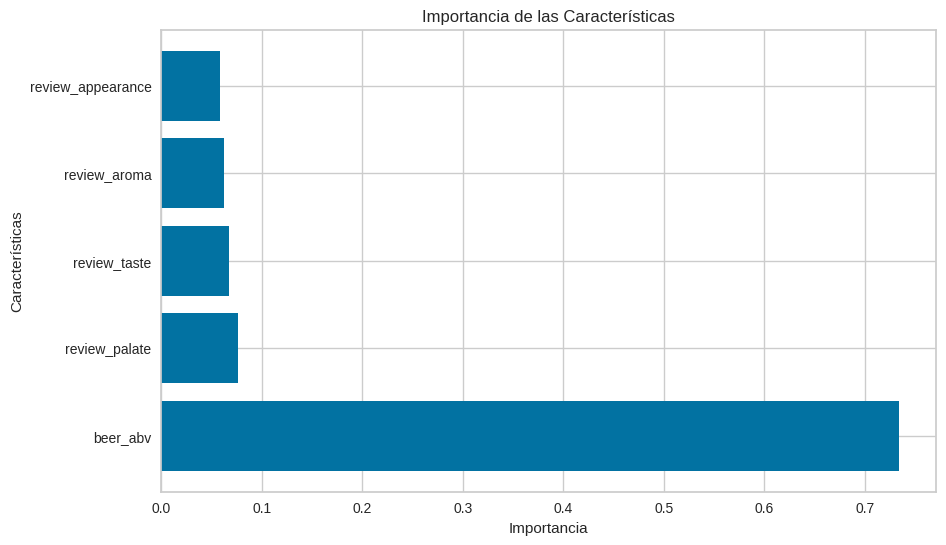

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Obtener la importancia de las características
feature_importance = rf_classifier.feature_importances_

# Obtener nombres de las características
feature_names = X.columns  # Asumiendo que X es tu conjunto de datos de características

# Crear un DataFrame para visualizar
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()


# Modelo de regresión RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Importamos RandomForestRegressor para regresión
from sklearn.impute import SimpleImputer
# Características relevantes y variable objetivo
features = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
target = 'review_overall'

# Separar las características y la variable objetivo
X = df[features]
y = df[target]

# Imputar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# División de los datos en conjuntos de entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos creados
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

# Inicializar el clasificador de Random Forest para regresión
### random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(
        random_state=42)

# Entrenar el modelo con los datos de entrenamiento
random_forest_reg.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
predictions = random_forest_reg.predict(X_test)

# Mostrar un informe de regresión

# Obtener la importancia de las características
feature_importance = random_forest_reg.feature_importances_

# Crear un DataFrame para mostrar las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, predictions)
print("Error Cuadrático Medio (MSE):", mse)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, predictions)
print("Coeficiente de Determinación (R2):",r2)

Forma de X_train: (75702, 5)
Forma de X_test: (18926, 5)
Forma de y_train: (75702,)
Forma de y_test: (18926,)
             Feature  Importance
3       review_taste    0.754829
4           beer_abv    0.101675
2      review_palate    0.056823
1  review_appearance    0.044418
0       review_aroma    0.042254
Error Cuadrático Medio (MSE): 0.1789389161946019
Coeficiente de Determinación (R2): 0.610787557548107


## Ajuste de hiperparametros
Este código realiza una búsqueda exhaustiva de hiperparámetros en una cuadrícula predefinida y devuelve los mejores valores encontrados

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Definir un espacio de búsqueda de hiperparámetros más reducido
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # Inicializar el RandomForestRegressor
# random_forest_reg = RandomForestRegressor(random_state=42)

# # Crear un objeto GridSearchCV
# grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid,
#                            scoring='r2', cv=5, n_jobs=-1)

# # Realizar la búsqueda de cuadrícula en los datos de entrenamiento
# grid_search.fit(X_train, y_train)

# # Obtener los mejores hiperparámetros encontrados
# best_params = grid_search.best_params_
# print("Mejores hiperparámetros:", best_params)

# # Utilizar el mejor modelo encontrado
# best_model = grid_search.best_estimator_

# # Hacer predicciones con el mejor modelo
# best_predictions = best_model.predict(X_test)

# # Calcular el coeficiente de determinación (R2) con el mejor modelo
# best_r2 = r2_score(y_test, best_predictions)
# print("Mejor Coeficiente de Determinación (R2):", best_r2)


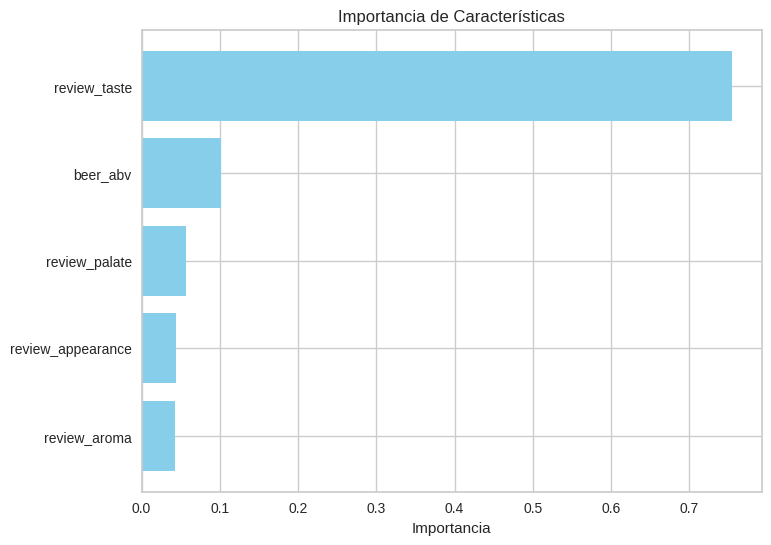

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras de importancia de características
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de Características')
plt.gca().invert_yaxis()  # Invertir para mostrar la característica más importante arriba
plt.show()


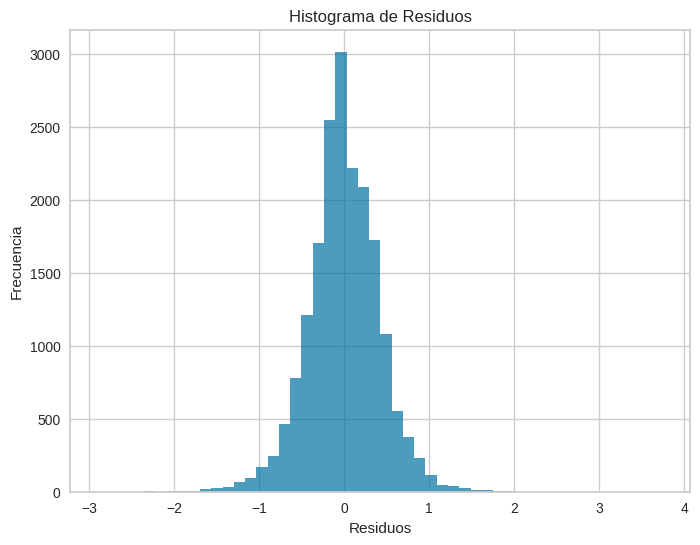

In [ ]:
# Calcular los residuos
residuos = y_test - predictions

# Graficar el histograma de los residuos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=50, alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()


Este histograma nos muestra la distribución de los residuos. Una distribución normal alrededor de cero indica que el modelo está capturando adecuadamente la variabilidad de los datos.

Los residuos son las diferencias entre los valores reales y las predicciones del modelo. Un gráfico de dispersión de residuos nos ayuda a visualizar si los errores del modelo tienen algún patrón o si están distribuidos aleatoriamente alrededor de cero.

In [ ]:
# Columnas a mantener
columnas_a_mantener = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']

# Eliminar columnas no deseadas
df3 = df_copia[columnas_a_mantener]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

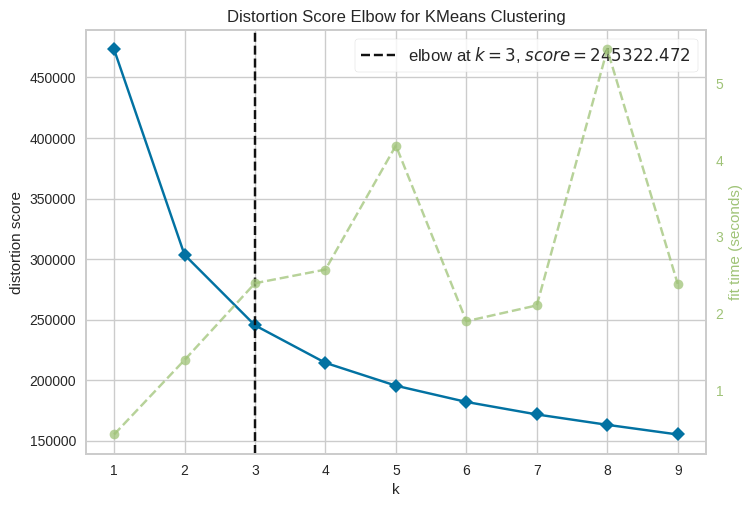

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Determina el número óptimo de clusters (k)
datos_interes = df3
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3)

visualizer = KElbowVisualizer(KMeans(), k=(1, 10))
visualizer.fit(scaled_data)
visualizer.show()

In [ ]:
# Selecciona el número óptimo de clusters (k)
cluster_optimos = visualizer.elbow_value_
cluster_optimos

3

In [ ]:
df_copia2 = df_copia.copy()

In [ ]:
# Columnas a mantener
columnas_a_mantener = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']

In [ ]:
# Aplica K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=cluster_optimos, random_state=42)
df_copia2['cluster'] = kmeans.fit_predict(scaled_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


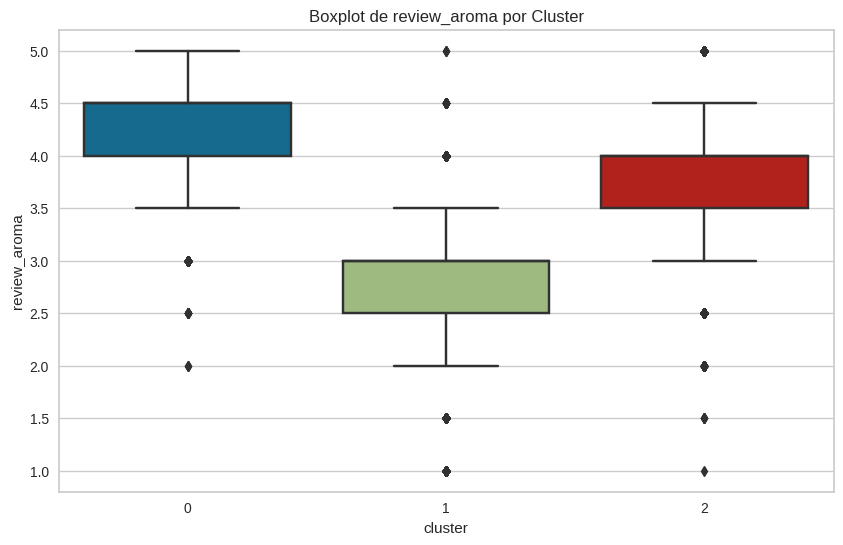

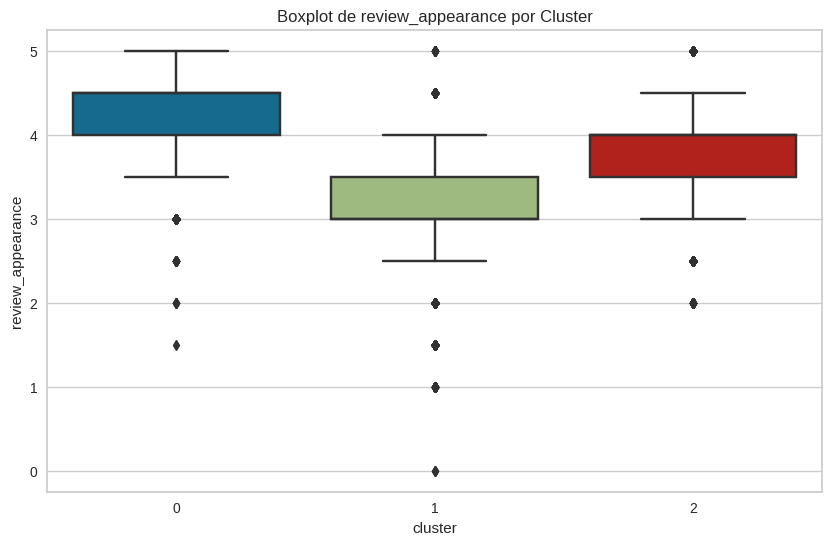

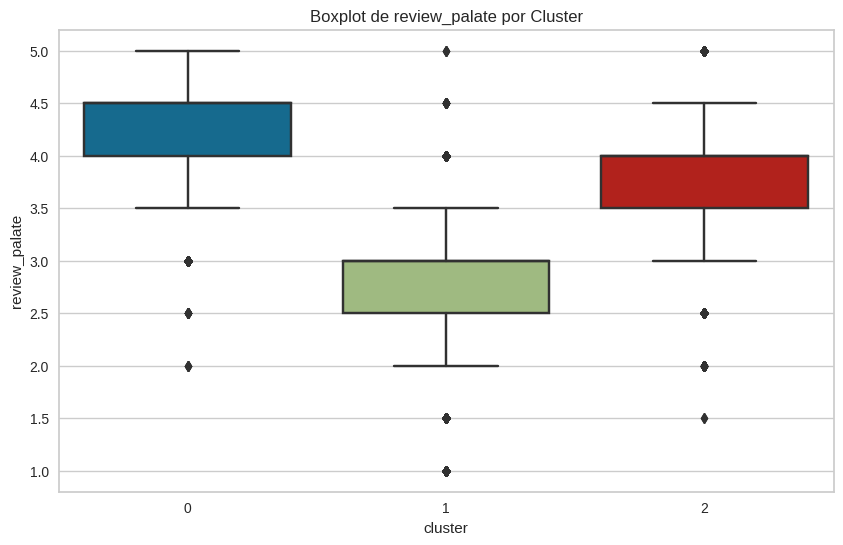

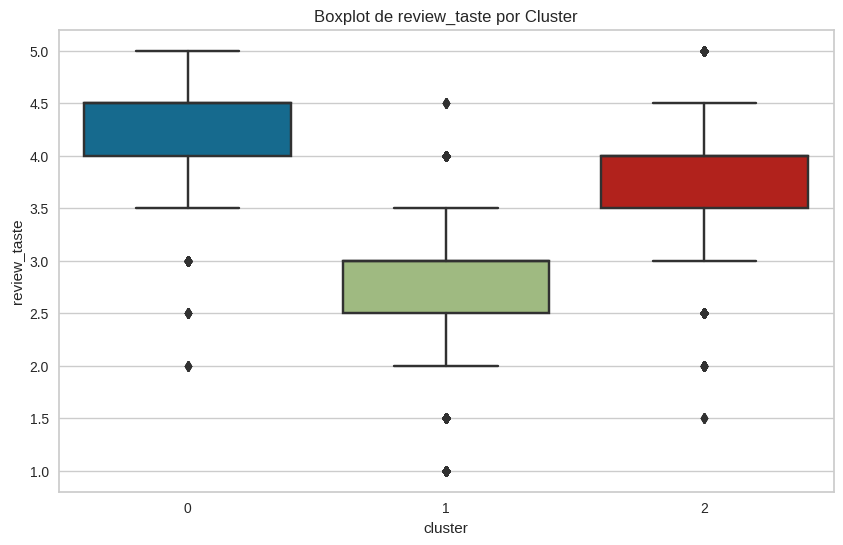

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in columnas_a_mantener:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="cluster", y=feature, data=df_copia2)
    plt.title(f"Boxplot de {feature} por Cluster")
    plt.show()

In [ ]:
# Definir las condiciones y los valores a asignar
conditions = [
    df_copia2['cluster'] == 0,
    df_copia2['cluster'] == 1,
    df_copia2['cluster'] == 2,
]

values = ["Mejor Puntuación", "Menor Puntuación", "Puntuación Media" ]

# Agregar la columna 'Puntuación' basándose en las condiciones
df_copia2['Puntuación'] = np.select(conditions, values, default="Otra Puntuación")
df_copia2